<a href="https://colab.research.google.com/github/Nivedhasriram/Machine-Learning-and-Algorithms/blob/main/Simple_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

In [12]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [13]:
# slope and intercept
m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
b = y_mean - m * x_mean

In [14]:
print("Slope = ", m)
print("Intercept = ",b)

Slope =  1.1696969696969697
Intercept =  1.2363636363636363


In [15]:
y_pred = m * x + b
SSE = np.sum((y - y_pred) ** 2)

In [16]:
print("Sum squared error : ", SSE)

Sum squared error :  5.624242424242423


In [17]:
SS_tot = np.sum((y- y_mean) ** 2)
R_squared = 1 - (SSE / SS_tot)
print("R-squared : ",R_squared)

R-squared :  0.952538038613988


In [18]:
# Gradient descent implementation
def gradient_descent(x,y,learning_rate = 0.01, epochs=1000):
    m ,b = 0, 0
    N = len(y)
    for _ in range(epochs):
        y_pred = m * x + b
        m_grad = (-2 / N) * np.sum(x * (y - y_pred))
        b_grad = (-2 / N) * np.sum(y - y_pred)
        m -= learning_rate * m_grad
        b -= learning_rate * b_grad
    return m,b

In [19]:
m_gd, b_gd = gradient_descent(x, y)
print(f"Full GD: Slope (m) = {m_gd}, Intercept (b) = {b_gd}")

Full GD: Slope (m) = 1.170263693076768, Intercept (b) = 1.2328099487610318


In [20]:
y_pred_gd = m_gd * x + b_gd
SSE_gd = np.sum((y - y_pred_gd) ** 2)
R_sqaured_gd = 1 - (SSE_gd / SS_tot)

In [21]:
print("Sum squared error (Gradient descent): ", SSE_gd)
print("R-squared (Gradient descent): ", R_sqaured_gd)

Sum squared error (Gradient descent):  5.624278989977716
R-squared (Gradient descent):  0.9525377300423822


In [22]:
#Stochastic Gradeint Descent Implementation
def gradient_descent_stochastic(x,y,learning_rate = 0.01, epochs=1000):
  m , b = 0,0
  N = len(y)
  for _ in range(epochs):
    for i in range(N):
      y_pred = m * x[i] + b
      m_grad = -2 * x[i] * (y[i] - y_pred)
      b_grad = -2 * (y[i] - y_pred)
      m -= learning_rate * m_grad
      b -= learning_rate * b_grad
  return m,b

In [23]:
m_gd_stochastic, b_gd_stochastic = gradient_descent_stochastic(x, y)
print(f"Stochastic GD: Slope (m) = {m_gd_stochastic}, Intercept (b) = {b_gd_stochastic}")

Stochastic GD: Slope (m) = 1.2986755729435908, Intercept (b) = 0.8967040680508923


In [24]:
y_pred_gd_stochastic = m_gd_stochastic * x + b_gd_stochastic
SSE_gd_stochastic = np.sum((y - y_pred_gd_stochastic) ** 2)
R_squared_gd_stochastic = 1 - (SSE_gd_stochastic / SS_tot)

In [25]:
print("Sum squared error (Stochastic Gradient Descent): ", SSE_gd_stochastic)
print("R-squared (Stochastic Gradient Descent): ", R_squared_gd_stochastic)

Sum squared error (Stochastic Gradient Descent):  7.576246971879953
R-squared (Stochastic Gradient Descent):  0.9360654263976376


In [9]:
#Question2

In [9]:
boston = pd.read_csv('HousingData.csv')

In [29]:
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [30]:
print(boston.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [32]:
correlations = boston.corr()['MEDV'].sort_values(ascending=False)
print(correlations)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


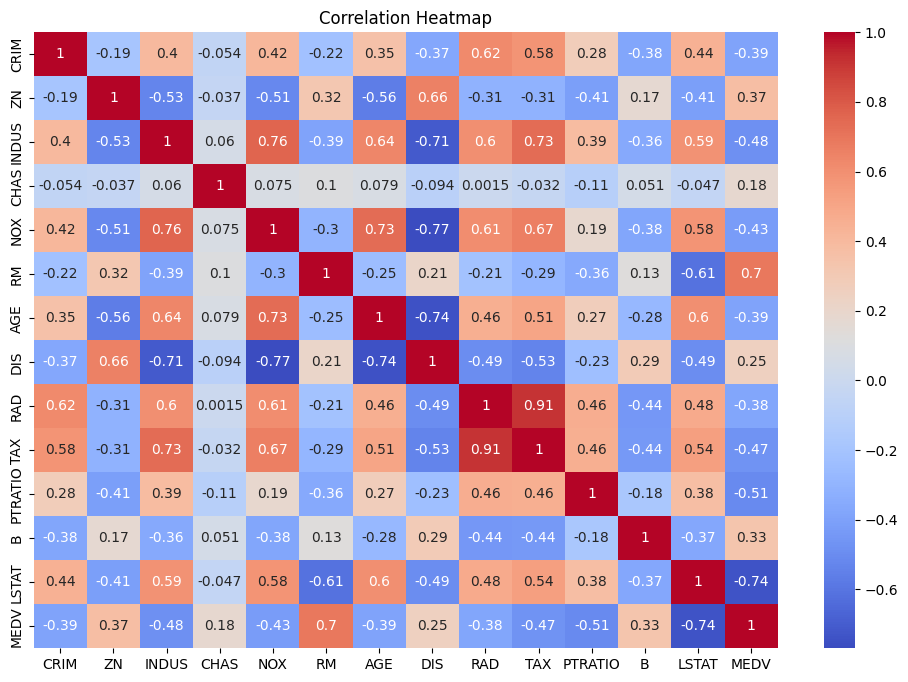

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
best_attribute = correlations.index[1]
print(f"The attribute that best follows a linear relationship with MEDV is: {best_attribute}")

The attribute that best follows a linear relationship with MEDV is: RM


In [35]:
X = boston[[best_attribute]].values
y = boston['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
# Coefficients using the normal equation
theta_analytic = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
print("Coefficients from Analytic Formulation:", theta_analytic)

Coefficients from Analytic Formulation: [22.79653465  6.62395564]


In [38]:
# Full-batch gradient descent
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.zeros(X_b.shape[1])
    for i in range(iterations):
        gradients = (2/m) * X_b.T @ (X_b @ theta - y)
        theta -= learning_rate * gradients
    return theta

theta_full_batch = gradient_descent(X_train, y_train)
print("Coefficients from Full-Batch Gradient Descent:", theta_full_batch)

Coefficients from Full-Batch Gradient Descent: [22.79653462  6.62395563]


In [40]:
# Stochastic gradient descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.zeros(X_b.shape[1])
    for iteration in range(iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T @ (xi @ theta - yi)
            theta -= learning_rate * gradients
    return theta

theta_stochastic = stochastic_gradient_descent(X_train, y_train)
print("Coefficients from Stochastic Gradient Descent:", theta_stochastic)

Coefficients from Stochastic Gradient Descent: [21.62461261  8.14315968]


In [41]:
# Comparing coefficients
print("\nComparison of Coefficients:")
print(f"Analytic Formulation: {theta_analytic}")
print(f"Full-Batch Gradient Descent: {theta_full_batch}")
print(f"Stochastic Gradient Descent: {theta_stochastic}")


Comparison of Coefficients:
Analytic Formulation: [22.79653465  6.62395564]
Full-Batch Gradient Descent: [22.79653462  6.62395563]
Stochastic Gradient Descent: [21.62461261  8.14315968]
